In [56]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

some_colors=[
    "#B73838",
    "#28AB35",
    "#3B13DB",
    "#DB6313",
    "#13DBDB",
    "#DB13DB",
    "#FFFF07",
    "#621080",
    "#0C080D",
    "#0A75DF",
    "#F20808",
]

In [31]:

class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    @classmethod
    def point_diff(cls, point1, point2):
        diff = math.sqrt(math.pow(point2.x - point1.x, 2) + math.pow(point2.y - point1.y, 2)) + 0.0000001
        return diff

    def __str__(self):
        return str((self.x, self.y))

    def __repr__(self):
        return str((self.x, self.y))

    def __neg__(self):
        return Point(-self.x, -self.y)

    @classmethod
    def div(cls, number, point, ):
        return Point(number / point.x, number / point.y)

    @classmethod
    def mul(cls, number, point, ):
        return Point(number * point.x, number * point.y)

    @classmethod
    def div_point_number(cls, point, number, ):
        return Point(point.x / number, point.y / number)

In [32]:
def read_points(path):
    file = pd.read_csv(path, )
    points = []
    for item in file.itertuples():
        # print(item)
        points.append(Point(item[1], item[2]))
    return points

In [33]:
point_list = read_points('../data/data2.csv')
print(point_list)

[(0.8047228971226958, 0.846790202707998), (0.3994346316609566, 0.445441076598593), (0.5868476997981978, 0.6055770475484085), (0.7456490207594961, 0.7272895095431822), (0.3680070648692156, 0.4396753310704829), (0.6180820880317481, 0.5831377183199753), (0.6201714556959033, 0.6104491635919469), (0.6061646627377226, 0.5788843234259945), (0.8855885779110717, 0.8138970027421157), (0.6132405714211439, 0.6131747443838885), (0.8086292851728056, 0.7501619379235132), (0.6468280375836255, 0.658409790314645), (0.3685709284953703, 0.4477462548389767), (0.417676756517397, 0.4475430344657579), (0.5935883963080005, 0.6553338597799832), (0.581807981688534, 0.6698964946701507), (0.7257298104368226, 0.7563384702862892), (0.6721741505074679, 0.6691696560622111), (0.5855112202541988, 0.5958050537230518), (0.6225612500179604, 0.6356568667355185), (0.4217507303261477, 0.4002430591861892), (0.77536595390884, 0.7298042885737972), (0.7985563768311718, 0.7980691326736808), (0.8813123397206779, 0.8743710349145241)

In [34]:
Point.point_diff(Point(1, 1), Point(2, 2))

1.4142136623730952

In [35]:
X = read_points('../data/data1.csv')

In [36]:
X[0]

(174.88333216667078, 310.0630629527251)

In [151]:

def model(X, c, m, iterate,plott=False):
    number_size = len(X)
    U = [[0] * number_size for _ in range(c)]
    V = random.choices(X, k=c)
    cost_list = []
    cost = 0
    for _ in range(iterate):
        for i in range(c):
            for k in range(number_size):
                sigma_j = 0
                for j in range(c):
                    sigma_j += math.pow((Point.point_diff(X[k], V[i]) / Point.point_diff(X[k], V[j])), 2 /( m - 1))

                U[i][k] = 1 / sigma_j

        # print("U ", U)

        for i in range(c):
            sigma_1 = Point(0, 0)
            sigma_uik_m = 0
            for k in range(number_size):
                uik_m = math.pow(U[i][k], m)
                sigma_1 += Point.mul(uik_m, X[k])

            for k in range(number_size):
                uik_m = math.pow(U[i][k], m)
                sigma_uik_m += uik_m

            V[i] = Point.div_point_number(point=sigma_1, number=sigma_uik_m)
        # print(V)

        cost = 0
        for k in range(number_size):
            for i in range(c):
                cost += math.pow(U[i][k], m) * math.pow(Point.point_diff(X[k], V[i]), 2)
        # print("cost =", cost)
    
    if plott:
        colors=random.choices(some_colors,k=c)
    
        cluster=[[]]*c
        for col in range(number_size):
            cluster_values=[item[col]for item in U]

            cluster_num=cluster_values.index(min(cluster_values))
            cluster[cluster_num].append(X[col])


        for i,cluster_points in enumerate(cluster):

            plt .scatter([point.x for point in cluster_points],[point.y for point in cluster_points],color=some_colors[i],alpha=1,s=20)

        plt .scatter([point.x for point in V],[point.y for point in V],color="black",alpha=1,s=100)
    
    
    return V, U, cost


number_size =  494
cluster num =  10


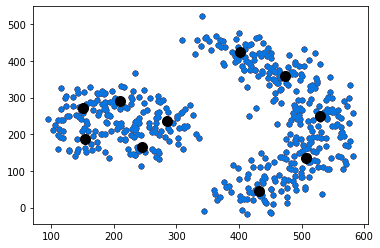

In [96]:
V, U, cost = model(X, 10, 2, 100,plott=True)

In [97]:
V, U, cost = model(X, 8, 4, 100)

number_size =  494
cluster num =  8


number_size =  494
cluster num =  2
number_size =  494
cluster num =  3
number_size =  494
cluster num =  4
number_size =  494
cluster num =  5
number_size =  494
cluster num =  6
number_size =  494
cluster num =  7
number_size =  494
cluster num =  8
number_size =  494
cluster num =  9
number_size =  494
cluster num =  10
number_size =  494
cluster num =  11


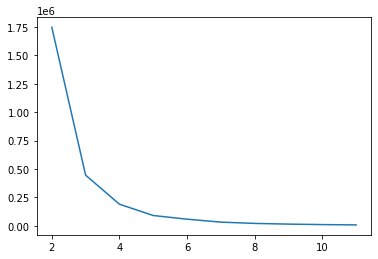

In [99]:
cost_list=[]
cluster_num_list=[]
for i in range(2,12):
    V, U, cost = model(X, i, 4, 100)
    cost_list.append(cost)
    cluster_num_list.append(i)
plt.plot(cluster_num_list,cost_list)

پس همانطور که میبینیم طبق روش

elbow

بهترین تعداد کلاستر برای دیتا ست اول ۴ است 

number_size =  1211
cluster num =  2
number_size =  1211
cluster num =  3
number_size =  1211
cluster num =  4
number_size =  1211
cluster num =  5
number_size =  1211
cluster num =  6
number_size =  1211
cluster num =  7
number_size =  1211
cluster num =  8
number_size =  1211
cluster num =  9
number_size =  1211
cluster num =  10
number_size =  1211
cluster num =  11


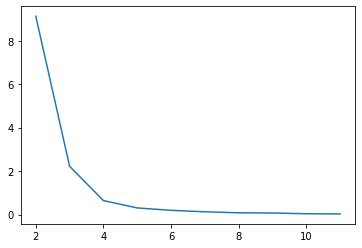

In [110]:
X = read_points('../data/data2.csv')
cost_list=[]
cluster_num_list=[]
for i in range(2,12):
    V, U, cost = model(X, i, 4, 100)
    cost_list.append(cost)
    cluster_num_list.append(i)
plt.plot(cluster_num_list,cost_list)


بهترین تعداد کلاستر برای دیتا ست دوم 5 است

number_size =  1211
cluster num =  5


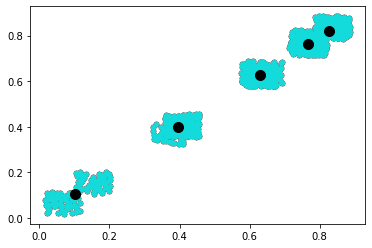

In [113]:
V, U, cost = model(X, 5, 4, 100,plott=True)

number_size =  755
cluster num =  2
number_size =  755
cluster num =  3
number_size =  755
cluster num =  4
number_size =  755
cluster num =  5
number_size =  755
cluster num =  6
number_size =  755
cluster num =  7
number_size =  755
cluster num =  8
number_size =  755
cluster num =  9
number_size =  755
cluster num =  10
number_size =  755
cluster num =  11


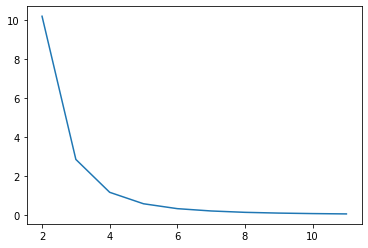

In [114]:
X = read_points('../data/data3.csv')
cost_list=[]
cluster_num_list=[]
for i in range(2,12):
    V, U, cost = model(X, i, 4, 100)
    cost_list.append(cost)
    cluster_num_list.append(i)
plt.plot(cluster_num_list,cost_list)

پس همانطور که میبینیم طبق روش

elbow

بهترین تعداد کلاستر برای دیتا ست سوم 5 است 

number_size =  755
cluster num =  4


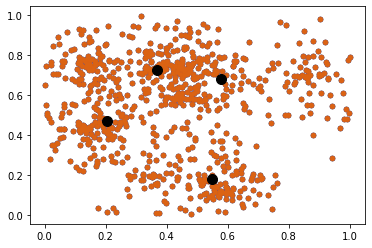

In [115]:
V, U, cost = model(X, 4, 4, 100,plott=True)

number_size =  449
cluster num =  2
number_size =  449
cluster num =  3
number_size =  449
cluster num =  4
number_size =  449
cluster num =  5
number_size =  449
cluster num =  6
number_size =  449
cluster num =  7
number_size =  449
cluster num =  8
number_size =  449
cluster num =  9
number_size =  449
cluster num =  10
number_size =  449
cluster num =  11


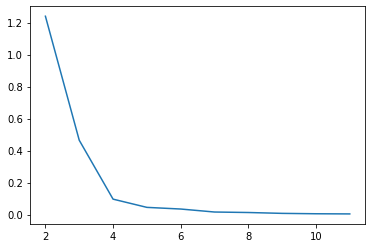

In [102]:
X = read_points('../data/data4.csv')
cost_list=[]
cluster_num_list=[]
for i in range(2,12):
    V, U, cost = model(X, i, 4, 100)
    cost_list.append(cost)
    cluster_num_list.append(i)
plt.plot(cluster_num_list,cost_list)


پس همانطور که میبینیم طبق روش

elbow

بهترین تعداد کلاستر برای دیتا ست چهارم 3 یا 4 است 


number_size =  449
cluster num =  3


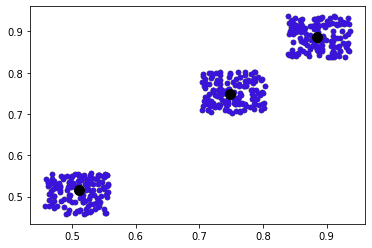

In [105]:
V, U, cost = model(X, 3, 4, 100,plott=True)

In [116]:
X = read_points('../data/data1.csv')

In [ ]:
V, U, cost = model(X, 3, 4, 100,plott=True)

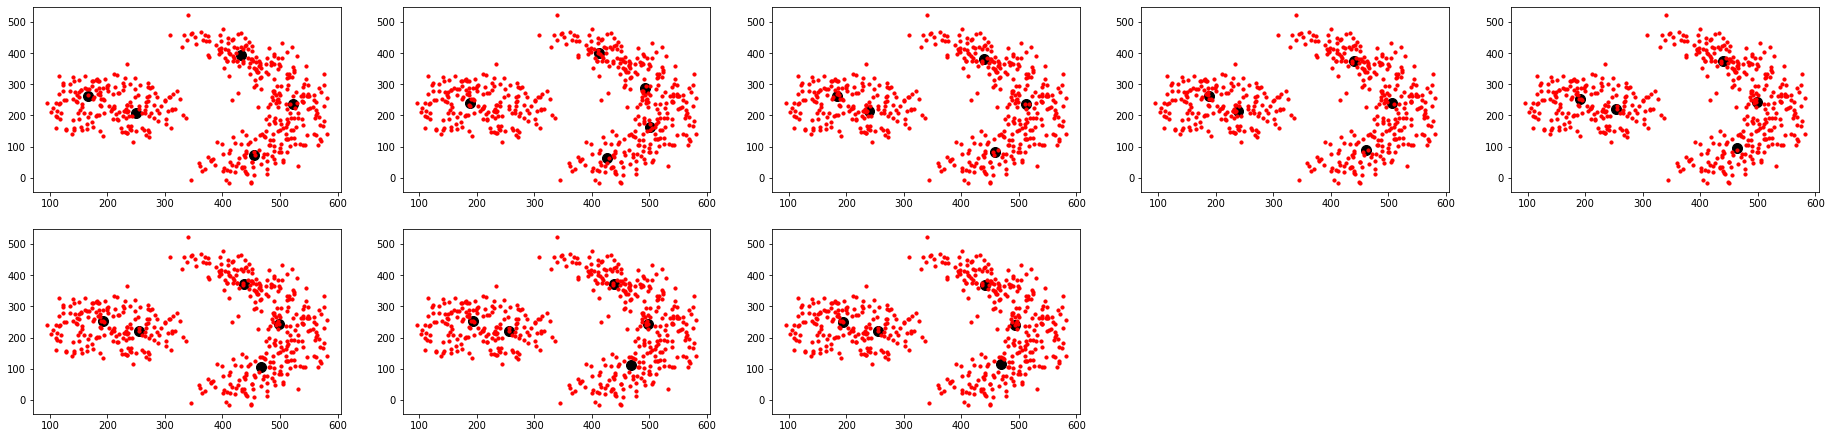

In [159]:
fig = plt.figure(figsize=(32, 32))
row=8
col=5
ax_list=[]
cost_list=[]
for i in range(2,10):
    ax = fig.add_subplot(row,col,i-1)
    V, U, cost = model(X, 5, i, 100,plott=False)
    cost_list.append(cost)
    ax.scatter([point.x for point in V],[point.y for point in V],color="black",alpha=1,s=100)
    ax.scatter([point.x for point in X],[point.y for point in X],color="red",alpha=1,s=10)
  
    ax_list.append(ax)
    


Text(0.5, 1.0, 'cost per m')

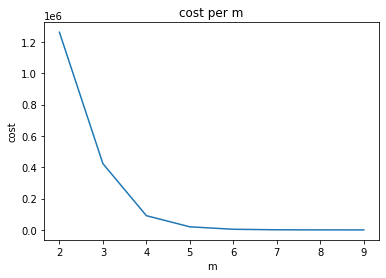

In [164]:
plt.plot(range(2,10),cost_list)
plt.xlabel('m')
plt.ylabel('cost')
plt.title("cost per m")

همانطور که میبینیم با افزایش مقدار

m

تابع هزینه کاهش میابد ولی برای دیدن تاثیر ان روی کلاستر بار دیگر با تعداد کلاستر بالا تر نمودار ها رو میکشیم

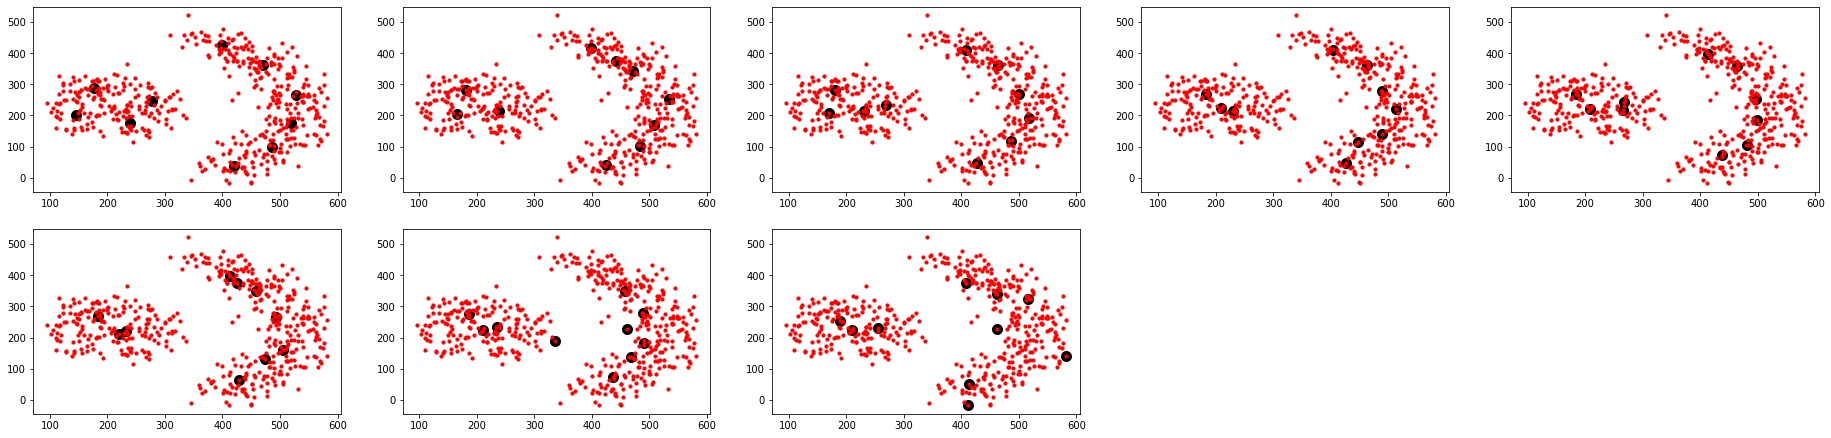

In [165]:
fig = plt.figure(figsize=(32, 32))
row=8
col=5
ax_list=[]
cost_list=[]
for i in range(2,10):
    ax = fig.add_subplot(row,col,i-1)
    V, U, cost = model(X, 10, i, 100,plott=False)
    cost_list.append(cost)
    ax.scatter([point.x for point in V],[point.y for point in V],color="black",alpha=1,s=100)
    ax.scatter([point.x for point in X],[point.y for point in X],color="red",alpha=1,s=10)
  
    ax_list.append(ax)
    


Text(0.5, 1.0, 'cost per m')

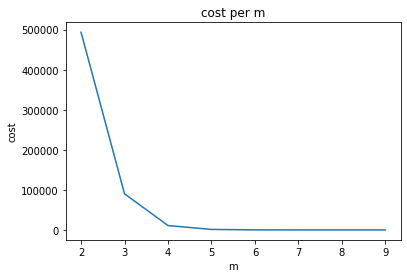

In [166]:
plt.plot(range(2,10),cost_list)
plt.xlabel('m')
plt.ylabel('cost')
plt.title("cost per m")

لزوما با افزایش  مقدار 

m

به خوشه بندی مناسب نمیرسیم و  به تلاش و تعداد پیمایش بیشتری برای  رسیدن به مقصود خواهیم داشت 